# Example of 2D and 3D scattering calculations

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from pynx.scattering.fhkl import Fhkl_thread

# The GPU name and language can be specified, or will be automatically selected
gpu_name=""
language=""

## 2D scattering from a 3D crystal

fhkl:    40 10^3 reflections,    64 10^3 atoms, speed=  1.318 10^9 reflections.atoms/s


<IPython.core.display.Javascript object>


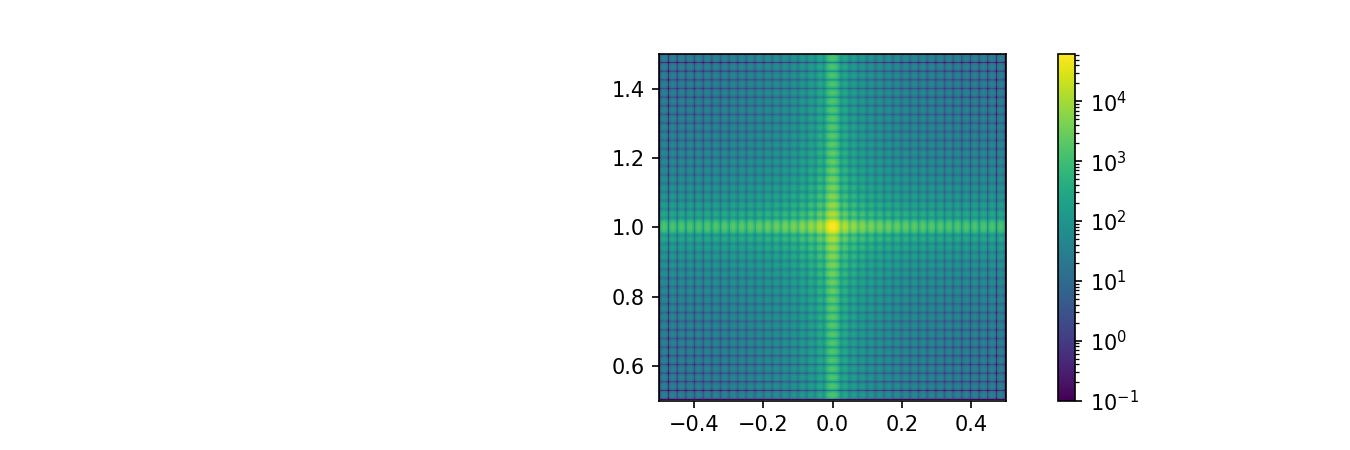

In [2]:
nx=40
ny=40
nz=40
nh=200
nk=200
nl = 1
# Create array of 3D coordinates
x = np.arange(0, nx, dtype=np.float32)
y = np.arange(0, ny, dtype=np.float32)[:, np.newaxis]
z = np.arange(0, nz, dtype=np.float32)[:, np.newaxis, np.newaxis]

# HKL coordinates as a 2D array, in reciprocal units of x,y,z
h = 0 + np.linspace(-.5, .5, nh)
k = 1 + np.linspace(-.5, .5, nk)[:, np.newaxis]
l = np.zeros_like(h+k)

# Computation (done twice - first time to compile kernel, second to get acurate dt)
fhkl, dt = Fhkl_thread(h, k, l, x, y, z, gpu_name=gpu_name, language=language)
fhkl, dt = Fhkl_thread(h, k, l, x, y, z, gpu_name=gpu_name, language=language)
print("fhkl: %5d 10^3 reflections, %5d 10^3 atoms, speed=%7.3f 10^9 reflections.atoms/s" % 
      (nh * nk * nl // 1000, nx * ny * nz // 1000, nx * ny * nz * nh * nk * nl / dt / 1e9))

plt.figure(figsize=(9,3))
plt.imshow(abs(fhkl), norm=LogNorm(vmin=0.1), extent=(h.min(), h.max(), k.min(), k.max()), origin='lower')
plt.colorbar()

## 2D scattering from a 3D crystal with a displacement field

fhkl:    10 10^3 reflections,  1000 10^3 atoms, speed=  1.287 10^9 reflections.atoms/s


<IPython.core.display.Javascript object>


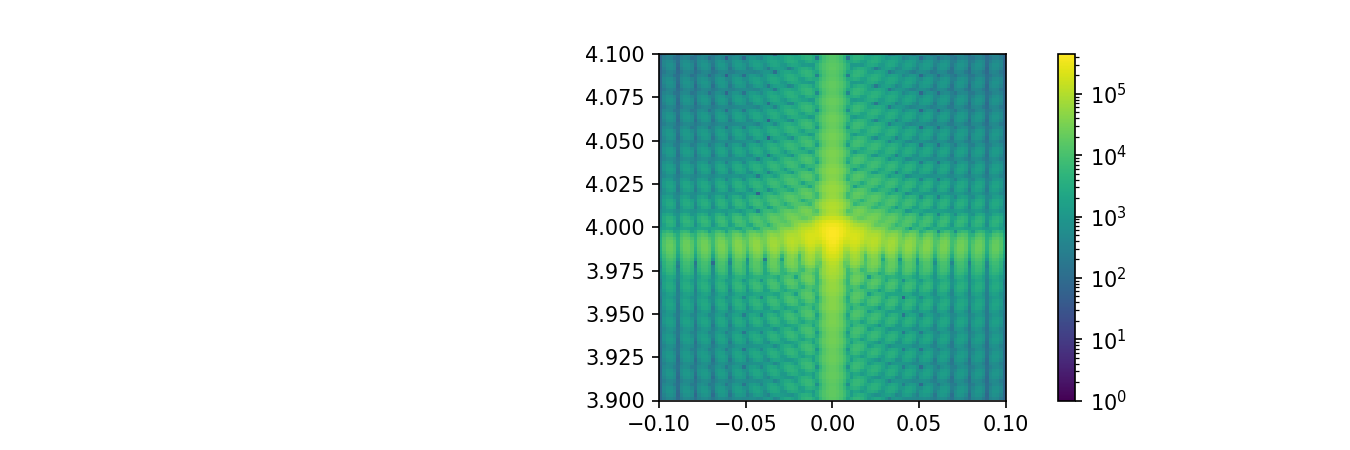

In [3]:
nx=100
ny=100
nz=100
nh=100
nl=100
nk = 1
# Create array of 3D coordinates
x = np.arange(-nx/2, nx/2, dtype=np.float32)
y = np.arange(-ny/2, ny/2, dtype=np.float32)[:, np.newaxis]
z = np.arange(0, nz, dtype=np.float32)[:, np.newaxis, np.newaxis]

z = z +1e-6 *z *(x**2 + y**2)

# HKL coordinates as a 2D array, in reciprocal units of x,y,z
h = 0 + np.linspace(-.1, .1, nh)
l = 4 + np.linspace(-.1, .1, nl)[:, np.newaxis]
k = np.zeros_like(h+l)

# Computation
fhkl, dt = Fhkl_thread(h, k, l, x, y, z, gpu_name=gpu_name, language=language)
print("fhkl: %5d 10^3 reflections, %5d 10^3 atoms, speed=%7.3f 10^9 reflections.atoms/s" % 
      (nh * nk * nl // 1000, nx * ny * nz // 1000, nx * ny * nz * nh * nk * nl / dt / 1e9))

plt.figure(figsize=(9,3))
plt.imshow(abs(fhkl), norm=LogNorm(vmin=1), extent=(h.min(), h.max(), l.min(), l.max()), origin='lower')
plt.colorbar()